<h1>Mini project : Reducing traffic mortality</h1></br>
<b>Realised by </b> : EL BOUANANI Nadir </br>
<b>Supervied by</b> : Yasin shah</br>
<b>Company </b> : Technocolabs softwares

<h2>Read in and get an overview of the data</h2>

In [377]:
#Importing pandas library
import pandas as pd
# Reading data
road_accidents = pd.read_csv('road-accidents.csv', comment = '#', sep = '|')
# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)
# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)
# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)
# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)
road_accidents.head()


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [378]:
road_accidents.tail()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


In [379]:
road_accidents.shape

(51, 5)

In [380]:
road_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


<h2>Create a textual and a graphical summary of the data</h2>


In [381]:
#textual summary of the data
data_summary=road_accidents.describe()
data_summary

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


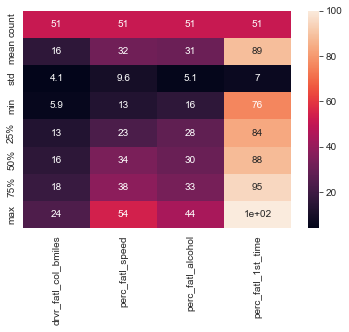

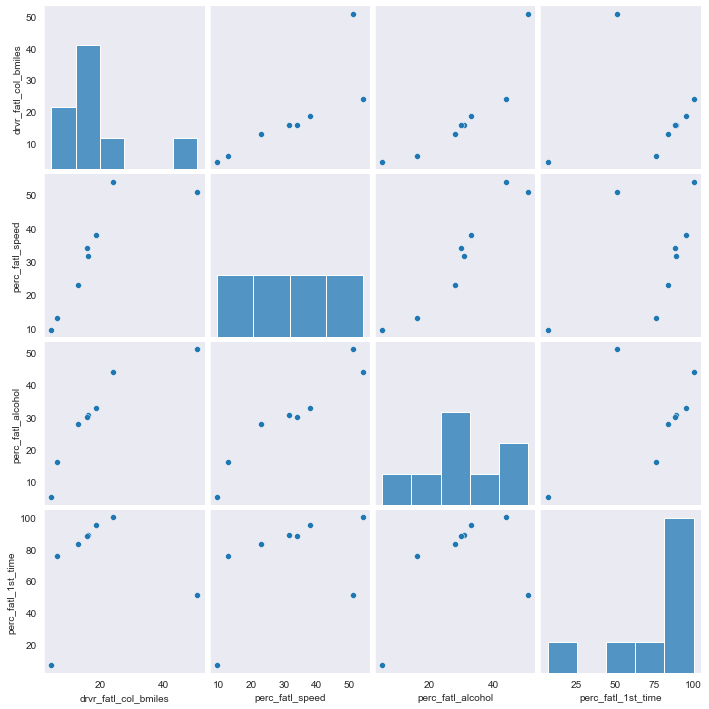

In [382]:
# import seaborn
import seaborn as sns
#graphical summary of the data
sns.set_style("dark")
sns.heatmap(data=data_summary, annot=True)
sns.pairplot(data_summary)

<h2>Quantify the association of features and accidents</h2>


In [383]:
#+1 	Complete positive correlation
#+0.8	Strong positive correlation
#+0.5	Moderate positive correlation
#+0.2	weak positive correlation
#0	No correlation
#-0.2	weak negative correlation
#-0.5	Moderate negative correlation
#-0.8	Strong negative correlation
#-1 	Complete negative correlation
road_accidents.corr()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


<h2>Fit a multivariate linear regression</h2>

In [384]:
from sklearn import linear_model
features = [ 'perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']
target=['drvr_fatl_col_bmiles']
X=road_accidents[features]
y=road_accidents[target]
#print(X)
#print(y)
#reg.fit will take X, y and will store the coefficients  of the linear model in its coef_ 
reg = linear_model.LinearRegression()
reg.fit(X,y)
reg.coef_

array([[-0.04180041,  0.19086404,  0.02473301]])

<h2>Perform PCA on standardized data</h2>

In [385]:
import numpy as np
import matplotlib.pyplot as plt
#standarizing data 
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scaled_fea = scale.fit_transform(X) 
#print(scaled_data)
#Principal component analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA()
# Fit the standardized data to the pca
pca.fit(scaled_fea)
#pca.n_components_
#pca.explained_variance_ratio_
# the cumulative  of variance explained by the first two principal components
first_two_var = pca.explained_variance_ratio_[0].cumsum()[0] + pca.explained_variance_ratio_[1].cumsum()[0]
print("The cumulative variance of the two first principal components : ",first_two_var)


The cumulative variance of the two first principal components :  0.7946978608104825


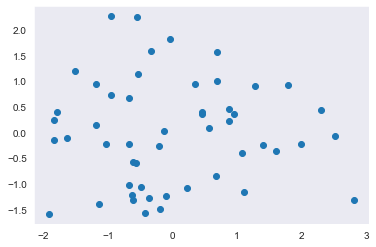

In [386]:
# Transform the scaled features using two principal components
pca = PCA(n_components = 2)
components = pca.fit_transform(scaled_fea)
#first component
component1 = components[:, 0]
#second component
component2 = components[:, 1]
#first two components
plt.scatter(component1, component2)

<h2>Find clusters of similar states in the data</h2>

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


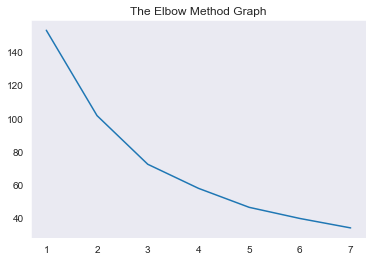

In [387]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans
# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 8)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k) and Fit the scaled features to the KMeans object
    km = KMeans(n_clusters=k,random_state = 3).fit(scaled_fea)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.title('The Elbow Method Graph')
plt.plot(ks, inertias)

<h2>KMeans to visualize clusters in the PCA scatter plot</h2>

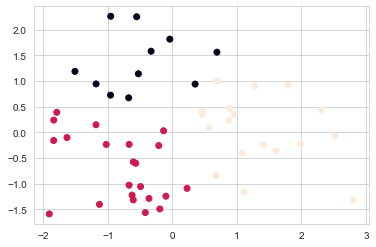

In [388]:
# Create a KMeans object with 3 clusters, use random_state=8 
nb_clusters=3
km = KMeans(n_clusters = nb_clusters, random_state = 3)

km.fit(scaled_fea)
sns.set_style("whitegrid")

# Create a scatter plot of the first two principal components and color it according to the KMeans cluster assignment 
plt.scatter(components[:, 0], components[:, 1], c = km.labels_)


<h2>Visualize the feature differences between the clusters</h2>

<h2>Compute the number of accidents within each cluster</h2>